In [1]:
%load_ext autoreload 
%autoreload 2
from remotedb import DB
from models import ltm_predictor
from modelsUtils import fake_images_generator, translate_image
from image_processor import ltm_img_processor

import numpy as np
import tensorflow as tf
#import keras
#from keras import backend as k
import datetime
import matplotlib.pyplot as plt

try:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    
except ImportError:
    !pip install googledrivedownloader
    from google_drive_downloader import GoogleDriveDownloader as gdd


Using TensorFlow backend.


In [129]:
#download_dataset(workspace_dir='./data/workspace/',google_file_id='1l6sQMu4lOTGxHKqBhY9mXpI4Pd-Z6E_N',  google_file='./data/Approved_1_2_3_labled_v3.zip')
# create train and valid datasets
#db, train_db, valid_db = load_dataset(dataset='data/Approved_1_2_3_labled_v3/Approved',p=.92)

#train_gen =  main_generator(batch_size=2,db=train_db,h=750,w=1600)

db = DB()
train_gen =  db.main_generator(batch_size=5,db=db.train_db)
valid_gen =  db.main_generator(batch_size=5,db=db.valid_db)


Total # of images in the dataset:  1492
Go for training 1372
Go for validating 120


images.shape (5, 750, 1600, 1)
img.shape (750, 1600, 1)
img.shape (750, 1600, 1)
img.shape (750, 1600, 1)
img.shape (750, 1600, 1)
img.shape (750, 1600, 1)
INFO:tensorflow:Restoring parameters from ./ltm_predictor_vanila-1000
Model restored.
[[0.41242653 0.49712014 0.5838947 ]
 [0.41559452 0.49999166 0.58704984]
 [0.40815192 0.4949051  0.58473164]
 [0.42389563 0.52581304 0.6243081 ]
 [0.411932   0.49665722 0.5847905 ]]


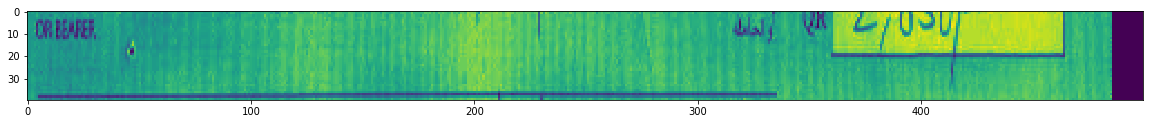

In [141]:
# test fake_images_generator()

tf.reset_default_graph()
ltm_images_ph = tf.placeholder(tf.float32,[None, 124,124,1])
l_pred = ltm_predictor(ltm_images_ph)


images, heights, widths, lines , ids = next(train_gen)

heights = np.array(heights)
heights = np.reshape(heights,(heights.shape[0],1))

widths = np.array(widths)
widths = np.reshape(widths,(widths.shape[0],1))


images = np.array(images)
ltm_images, l_true = ltm_img_processor(images, heights, widths,lines)




images_ph =tf.placeholder(tf.float32,[None, 750,1600,1])
heights_ph =tf.placeholder(tf.int32,[None, 1])
widths_ph =tf.placeholder(tf.int32,[None, 1])
fake_images = fake_images_generator(images_ph,heights_ph, widths_ph,l_pred,2)


tvars = tf.trainable_variables()

p_vars = [var for var in tvars if 'p_' in var.name]

ops = tf.global_variables_initializer()
saver = tf.train.Saver(p_vars)

tf.logging.set_verbosity(tf.logging.INFO)

with tf.Session() as sess:
    sess.run(ops)
    saver.restore(sess, "./ltm_predictor_vanila-1000",)
    print("Model restored.")
    images_1, l_pred = sess.run(fake_images, feed_dict={ltm_images_ph:ltm_images,images_ph:images,heights_ph:heights,widths_ph:widths})
   
print(l_pred)
plt.figure(figsize=[20,10])
plt.subplot(2,1,1)
plt.imshow(np.squeeze(images_1[0]))



In [1]:
%load_ext autoreload 
%autoreload 2
#from dataset import download_dataset , load_dataset, main_generator
from remotedb import DB
from models import ltm_predictor
from modelsUtils import fake_images_generator, translate_image
from image_processor import ltm_img_processor

import numpy as np
import tensorflow as tf
#import keras
#from keras import backend as k
import datetime
import matplotlib.pyplot as plt

try:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    
except ImportError:
    !pip install googledrivedownloader
    from google_drive_downloader import GoogleDriveDownloader as gdd

from tcng import TCNNG

tf.reset_default_graph()
tf.keras.backend.clear_session()
db_pars={"maxL":70,"hwprlabel":"lower","workspace_dir":"./data/workspace/",
         "google_file_id":"1l6sQMu4lOTGxHKqBhY9mXpI4Pd-Z6E_N",
         "google_file":"data/Approved_1_2_3_labled_v3.zip","dataset":"data/Approved_1_2_3_labled_v3/Approved",
         "p":.92,"hl":750,"wl":1600,"cl":1}

db = DB(db_pars)
tcn_pars={"batch_size":8,"h":40,"w":500,"c":1,"lr":0.001,"op":"adam","lr_decay":0.9,
          "debug":0,"pathSaveModel":"data/logs/models/","load":None,
          "stepepoch":1000,"epochs":50,"verbose":1,"tb_log_dir":"data/logs/tb"}


/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Total # of images in the dataset:  1492
Go for training 1372
Go for validating 120


In [2]:
trainer = TCNNG(mydb=db, pars=tcn_pars,name='optimize_ltm')
!rm -rf data/logs/tb/* 
!rm -rf data/logs/models/* 

trainer.train()
#db.evaluate(trainer.model, trainer.eval_model)                                
#db.saveResult(trainer.model,trainer.saveResult, trainer.name)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
to save to: data/logs/models/optimize_ltm_2019-04-16_05:49:00_{epoch:04d}-{loss:.4f}.hdf5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 750, 1600, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
_____________________________________________________________

Epoch 1/50
1000/1000 [==============================] - 135s 135ms/step - loss: 26.2778 - val_loss: 14.5583
out.shape (8, 35)
False P: fu thousand seuen hundred on ighty  , T: four thousand seven hundred and eighty 
False P: two ntly , T:  two only
False P: four thousand sevee hundred , T: four thousand seven hundred 
False P:  eiounrty tw only , T:   eighty two only
False P: fhfre thousand seiehn hundred  , T: three thousand seven hundred 
False P: fifty sonly , T:  fifty only  
False P: fifeen thousd even , T: fifteen thousand seven 

ler:0.1944151730335941

Epoch 00001: loss improved from inf to 26.27777, saving model to data/logs/models/optimize_ltm_2019-04-16_05:49:00_0001-26.2778.hdf5
Epoch 2/50
1000/1000 [==============================] - 125s 125ms/step - loss: 8.1621 - val_loss: 10.2196
out.shape (8, 33)
True P:   , T:  
False P: eiur thousand and wunr iynlnd   , T:  eight thousand and twenty five qatari riyal only
False P: five thousand irty only  , T: five thousand thirty on

1000/1000 [==============================] - 119s 119ms/step - loss: 0.8676 - val_loss: 4.9034
out.shape (8, 45)
True P:   , T:  
False P:  einht thousand and tweunty fhi hai iaed only , T:  eight thousand and twenty five qatari riyal only
True P:   , T:  
False P:  four thousand ighatiy furty riynaty , T:  four thousand eighty four only
False P: four thousand oandy fifty fioaly  , T: four thousand and fifty only 
False P:  , T:  
False P: seighteen thousand only  , T: eighteen thousand only  

ler:0.11862824675324676

Epoch 00014: loss improved from 0.99441 to 0.86763, saving model to data/logs/models/optimize_ltm_2019-04-16_05:49:00_0014-0.8676.hdf5
Epoch 15/50
1000/1000 [==============================] - 121s 121ms/step - loss: 0.7701 - val_loss: 7.1098
out.shape (8, 32)
True P: five thousand five hundred , T: five thousand five hundred
False P:  fornty eight only  , T: forty eight only
False P: two thhonusand five , T: two thousand five 
False P: hundred only  , T:  hundred only
Fa

1000/1000 [==============================] - 120s 120ms/step - loss: 0.4356 - val_loss: 9.3535
out.shape (8, 38)
False P: two housand  three hundred  , T: two thousand  three hundred 
False P:  only  , T:  only   
False P: eelven thousand  , T: eleven thousand 
False P:  qataftr rfiyal   , T: qatari riyals  only
True P:   , T:  
False P:  six thousand one huhndred twenty only , T:  six thousand one hundred twenty only
False P: ine thousand only  , T: nine thousand only  

ler:0.11522435897435897

Epoch 00027: loss did not improve
Epoch 28/50
1000/1000 [==============================] - 121s 121ms/step - loss: 0.3538 - val_loss: 15.6841
out.shape (8, 34)
True P: five thousand only  , T: five thousand only 
True P:   , T:  
False P: four thousand three hundred , T: four thousand three hundred 
False P: thirty four  , T:  thirty four
True P:   , T:  
False P:  eight thousand qr  , T:  eight thousand qr
False P: four thousands fifty riynalsd only , T: four thousands fifty riyals only 

ler

1000/1000 [==============================] - 121s 121ms/step - loss: 0.2866 - val_loss: 5.5823
out.shape (8, 33)
False P: five thousand thirty only  , T: five thousand thirty only
True P:   , T:  
True P:   , T:  
False P:  six thousand three hundred onlyt , T:  six thousand  three hundred only
True P: three thousand six hundred  , T: three thousand six hundred 
True P:  and sixty five only , T:  and sixty five only
False P: eght thousand only , T: eight thousand only

ler:0.010611205432937181

Epoch 00041: loss did not improve
Epoch 42/50
1000/1000 [==============================] - 121s 121ms/step - loss: 0.2120 - val_loss: 8.0502
out.shape (8, 43)
True P:   , T:  
False P: eight thousand and twienty fivo trr ied oly , T:  eight thousand and twenty five qatari riyal only
False P: fourt thousand and fifty onl  , T: four thousand and fifty only 
False P:  , T:  
False P: nine thousand five thundredd  , T: nine thousand five hundred 
True P:   , T:  
True P:   , T:  

ler:0.064258241758

Total # of images in the dataset:  1492
Go for training 1372
Go for validating 120
cropped_images.shape (4, 40, 500, 1)


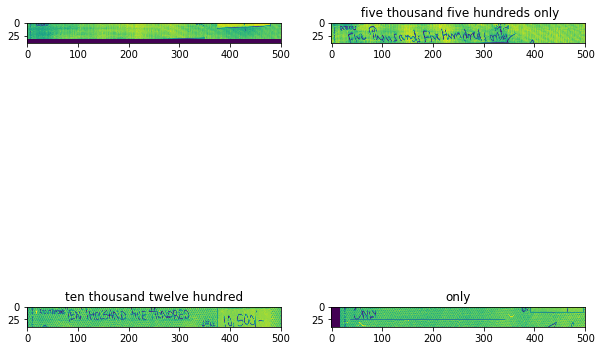

In [3]:
from tcng import fake_images_generator

tf.reset_default_graph()
batch_size=2

images_ph =tf.placeholder(tf.float32,[None, 750,1600,1])
heights_ph =tf.placeholder(tf.int32,[None, 1])
widths_ph =tf.placeholder(tf.int32,[None, 1])
l_true_ph =tf.placeholder(tf.float32,[None, 3])


real_images_hw = fake_images_generator(images_ph,heights_ph, widths_ph,l_true_ph,batch_size)

db_pars={"maxL":70,"hwprlabel":"lower","workspace_dir":"./data/workspace/",
         "google_file_id":"1l6sQMu4lOTGxHKqBhY9mXpI4Pd-Z6E_N",
         "google_file":"data/Approved_1_2_3_labled_v3.zip","dataset":"data/Approved_1_2_3_labled_v3/Approved",
         "p":.92,"hl":750,"wl":1600,"cl":1}

db = DB(db_pars)
train_gen = db.main_generator(tr=True, batch_size=batch_size)

(images, heights, widths, lines,labels,seq_lens), _ = next(train_gen)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    cropped_images, _ = sess.run(real_images_hw, feed_dict={images_ph:images,heights_ph:heights,widths_ph:widths,l_true_ph:lines})
    
print("cropped_images.shape",cropped_images.shape)
#for i in labels db.Ivoc
plt.figure(figsize=(10,20))
for j in range(int(batch_size*2)):
    plt.subplot(4,2,j+1)
    plt.title(''.join([db.Ivoc[i] for i in labels[j] if i in  db.Ivoc.keys()]))
    img = np.squeeze(cropped_images[j])
    shape = img.shape
    img = img.reshape(shape[0], shape[1])
        
    plt.imshow(img)